In [11]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [12]:
df=pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [13]:
#KEŞİFSEL VERİ ANALİZİ

def check_df(dataframe): #verisetinin özelliklerini göster
    print("-----------SHAPE--------")
    print(dataframe.shape) #satır ve sütun sayısı
    print("-----------COLUMNS---------")
    print(dataframe.columns) #sütun adlarını gösterir
    print("------------INFO------------")
    dataframe.info() #verisetinin temel bilgileri
    print("-------------TYPES-----------")
    print(dataframe.dtypes) #her sütunun veri türü
    print("-------------HEAD--------------")
    print(dataframe.head()) #baş kısım
    print("------------TAIL---------------")
    print(dataframe.tail()) #son birkaç satır
    print("-----------NA---------------")
    print(dataframe.isnull().sum())#eksik değerleri gösterir

In [14]:
check_df(df) #check_df fonksiyonu çağrılır

-----------SHAPE--------
(2111, 17)
-----------COLUMNS---------
Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
------------INFO------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                           

In [15]:
print("--------SAMPLE----------")  #rastgele veri getirir
print(df.sample())

--------SAMPLE----------
    Gender        Age    Height     Weight family_history_with_overweight  \
999   Male  23.884212  1.713825  83.952968                            yes   

    FAVC  FCVC     NCP       CAEC SMOKE      CH2O SCC      FAF  TUE  \
999  yes   2.0  2.6648  Sometimes    no  1.810738  no  0.80989  1.0   

          CALC                 MTRANS           NObeyesdad  
999  Sometimes  Public_Transportation  Overweight_Level_II  


In [16]:
df.describe() #sayısal sütunlara ilişkin istatistikler

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [17]:
#kategorik,sayısal, kardinal verilerin tespiti
def column_detection(dataframe:pd.DataFrame,cat_th:int=10,car_th: int=29): #eşik değerlerin verilmesi
    cat_cols=[col for col in dataframe.columns if dataframe[col].dtypes =="0"] #veri türü 0 olanlar kategorik kabul ediliyor, liste oluşturuluyor
    num_but_cat=[col for col in dataframe.columns if dataframe[col].nunique()<cat_th and dataframe[col].dtypes !="0"] #hem sayısal değer hem kategorik
    cat_but_car=[col for col in dataframe.columns if dataframe[col].nunique()>cat_th and dataframe[col].dtypes !="0"]
    cat_cols=cat_cols+num_but_cat
    cat_cols=[col for col in cat_cols if col not in cat_but_car]
    
    num_cols=[col for col in dataframe.columns if dataframe[col].dtypes !="0"]
    num_cols=[col for col in num_cols if col not in num_but_cat]
    
    print("\n--------------CATEGORIC------------")
    print(cat_cols)
    print("\n--------------NUMERIC------------")
    print(num_cols)
    print("\n--------------CATEGORIC BUT CARDINAL------------")
    print(cat_but_car)
    print("\n--------------NUMERIC BUT CATEGORIC------------")
    print(num_but_cat)
    print("\n--------------COLUMNS OVERVİEW-----------------")
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols,num_cols,cat_but_car,num_but_cat

In [19]:
cat_cols,num_cols,cat_but_car,num_but_cat=column_detection(df)


--------------CATEGORIC------------
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

--------------NUMERIC------------
['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

--------------CATEGORIC BUT CARDINAL------------
['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

--------------NUMERIC BUT CATEGORIC------------
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

--------------COLUMNS OVERVİEW-----------------
Observations: 2111
Variables: 17
cat_cols: 9
num_cols: 8
cat_but_car: 8
num_but_cat: 9


        Gender      Ratio
Male      1068  50.592136
Female    1043  49.407864


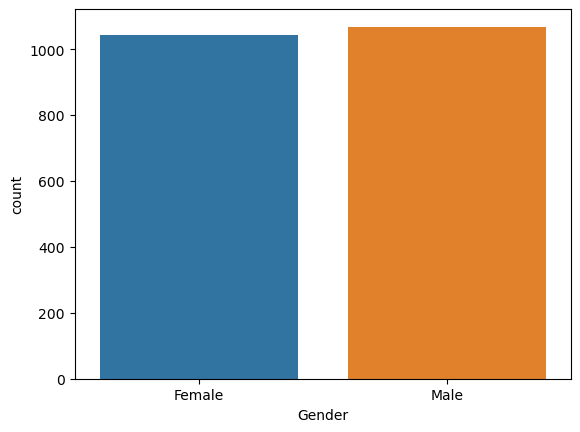

     family_history_with_overweight      Ratio
yes                            1726  81.762198
no                              385  18.237802


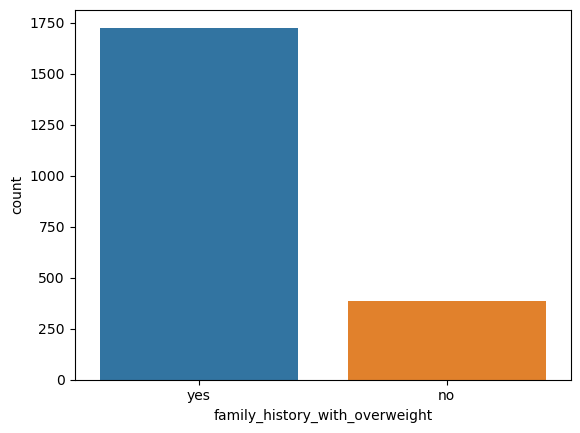

     FAVC      Ratio
yes  1866  88.394126
no    245  11.605874


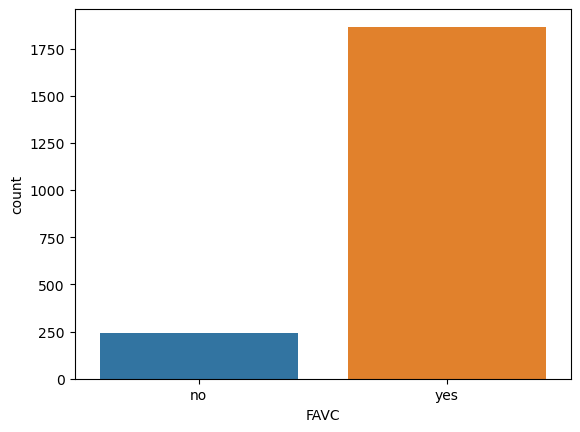

            CAEC      Ratio
Sometimes   1765  83.609664
Frequently   242  11.463761
Always        53   2.510658
no            51   2.415917


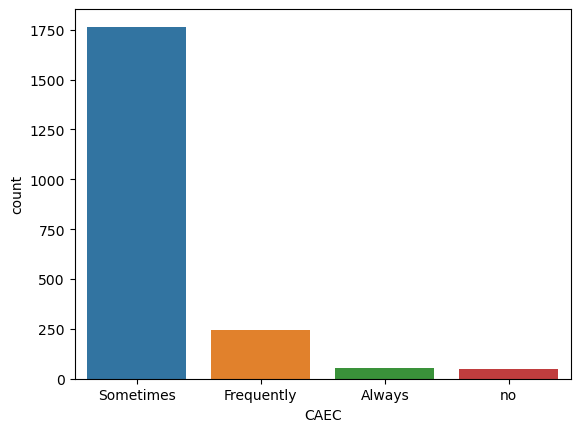

     SMOKE     Ratio
no    2067  97.91568
yes     44   2.08432


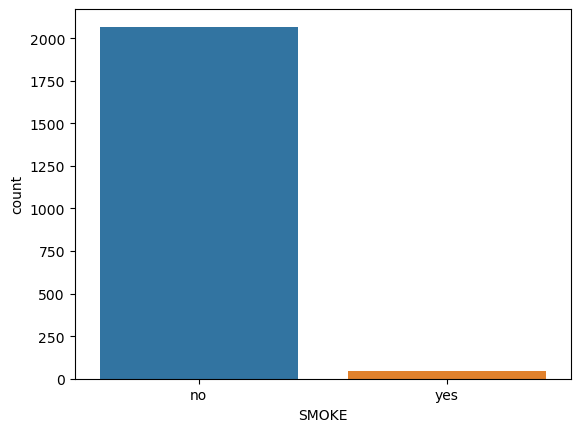

      SCC      Ratio
no   2015  95.452392
yes    96   4.547608


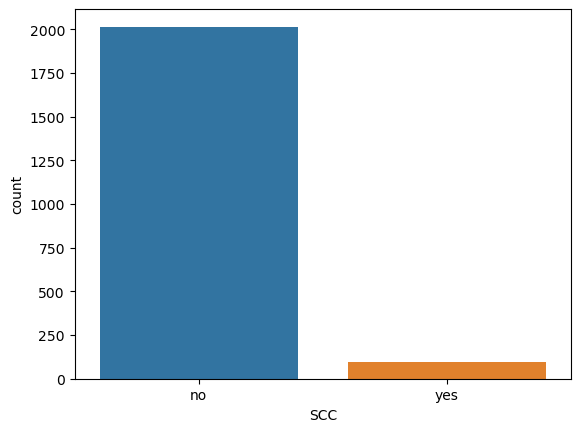

            CALC      Ratio
Sometimes   1401  66.366651
no           639  30.270014
Frequently    70   3.315964
Always         1   0.047371


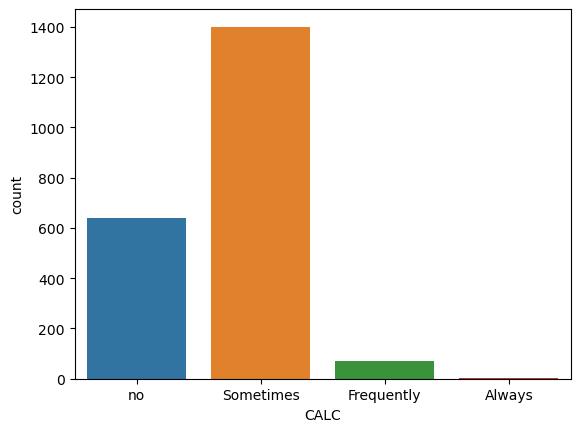

                       MTRANS      Ratio
Public_Transportation    1580  74.846045
Automobile                457  21.648508
Walking                    56   2.652771
Motorbike                  11   0.521080
Bike                        7   0.331596


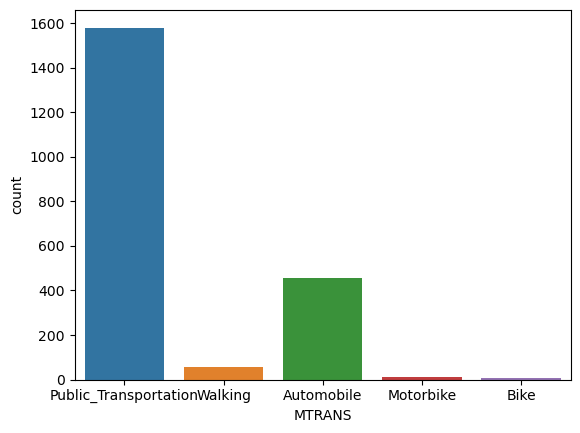

                     NObeyesdad      Ratio
Obesity_Type_I              351  16.627191
Obesity_Type_III            324  15.348176
Obesity_Type_II             297  14.069162
Overweight_Level_I          290  13.737565
Overweight_Level_II         290  13.737565
Normal_Weight               287  13.595452
Insufficient_Weight         272  12.884889


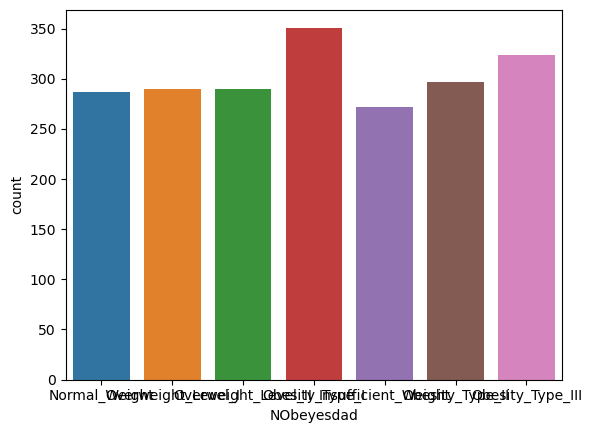

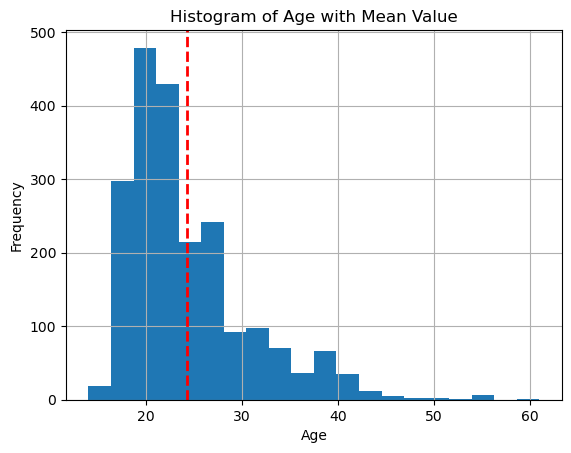

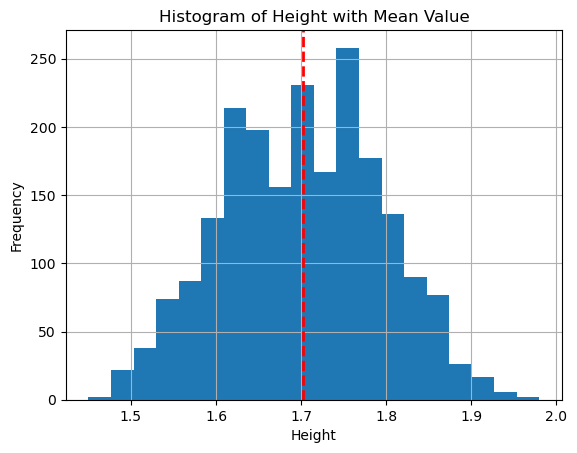

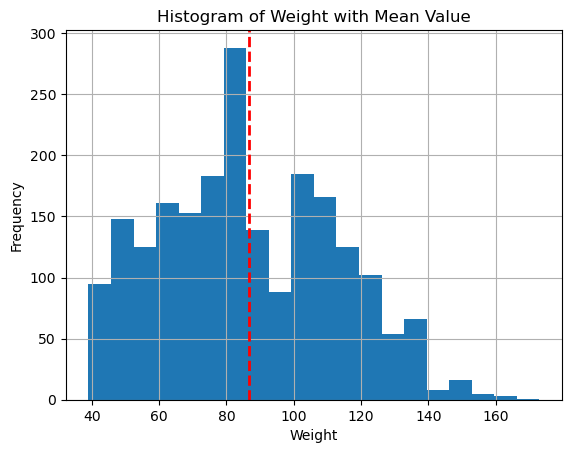

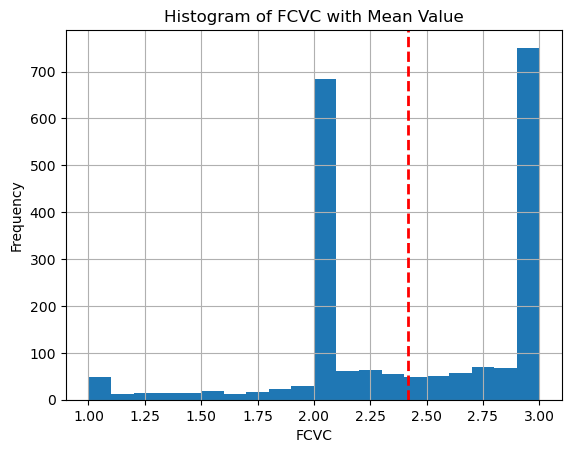

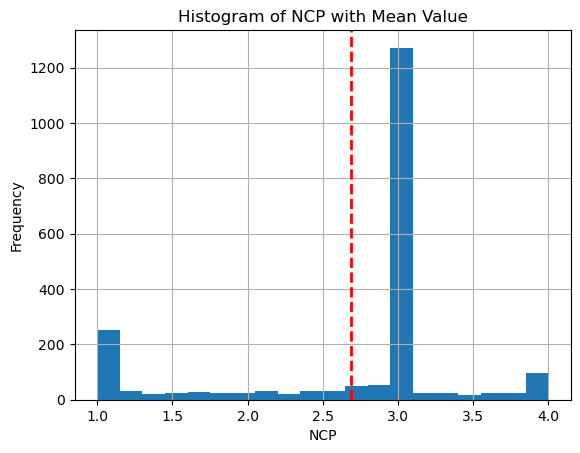

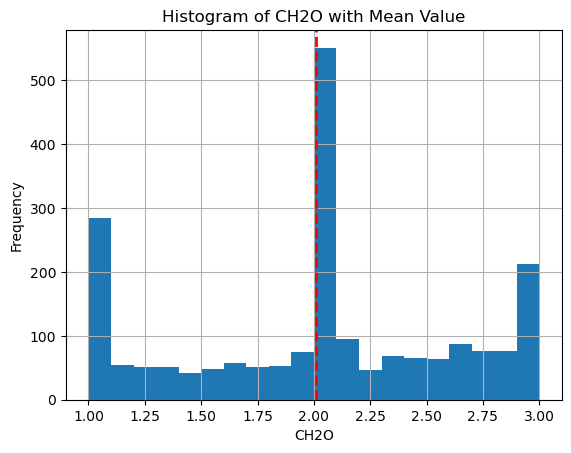

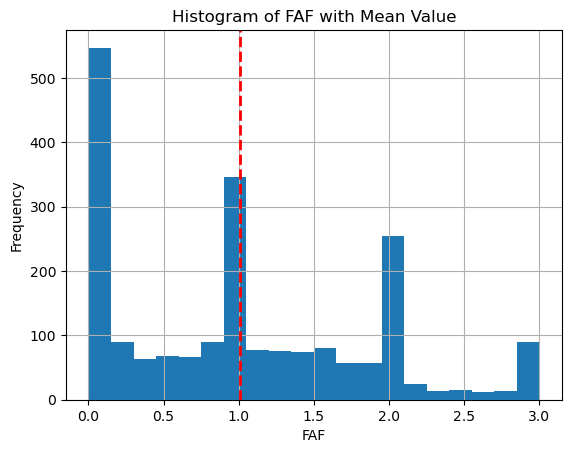

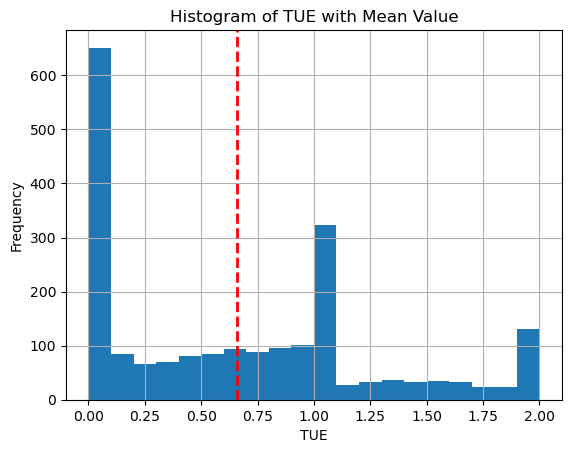

In [20]:
#Görselleştirme
def cat_summary(dataframe, col_name, plot=True):  #her bir kategoriye ait gözlem sayılarını ve bu sayıların toplam gözlem sayısına oranını 
    print(pd.DataFrame({col_name:dataframe[col_name].value_counts(), 
                        "Ratio":100 * dataframe[col_name].value_counts()/len(dataframe)}))
    
    if plot:
        sns.countplot(x=dataframe[col_name],data=dataframe)  #her bir kategorinin sıklığını görselleştirir.
        plt.show(block=True)
        
for col in cat_cols:
    cat_summary(df,col)
    
def hist_num_columns_show(dataframe,num_column):
    mean_value = dataframe[num_column].mean()
    dataframe[num_column].hist(bins=20)
    plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=2)  #ortalama
    plt.xlabel(num_column)
    plt.ylabel("Frequency")
    plt.title(f'Histogram of {num_column} with Mean Value')
    plt.show(block=True)
    
for num_col in num_cols:
    hist_num_columns_show(df,num_col)
    
    

<function matplotlib.pyplot.show(close=None, block=None)>

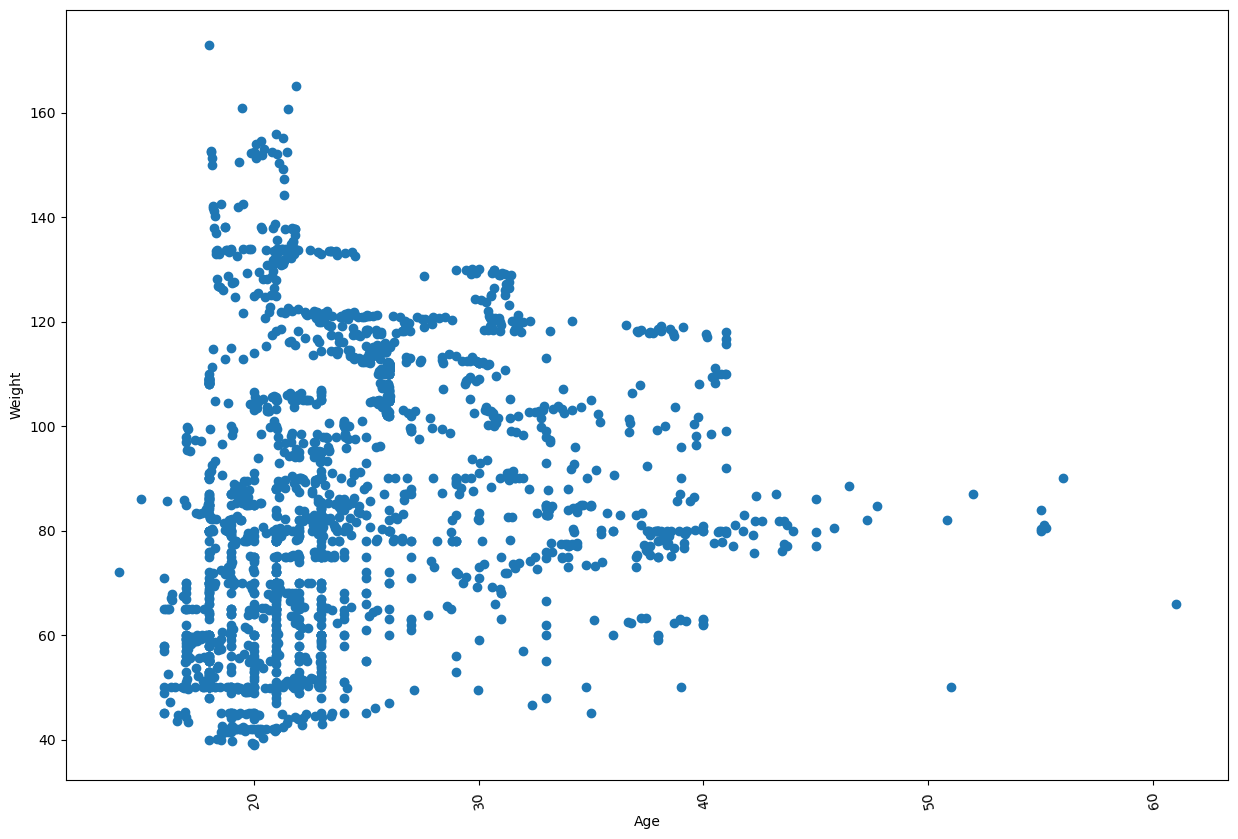

In [21]:
plt.figure(figsize=(15,10))
plt.scatter("Age","Weight",data=df)
plt.xticks(rotation=100)
plt.xlabel("Age")
plt.ylabel("Weight")
plt.show

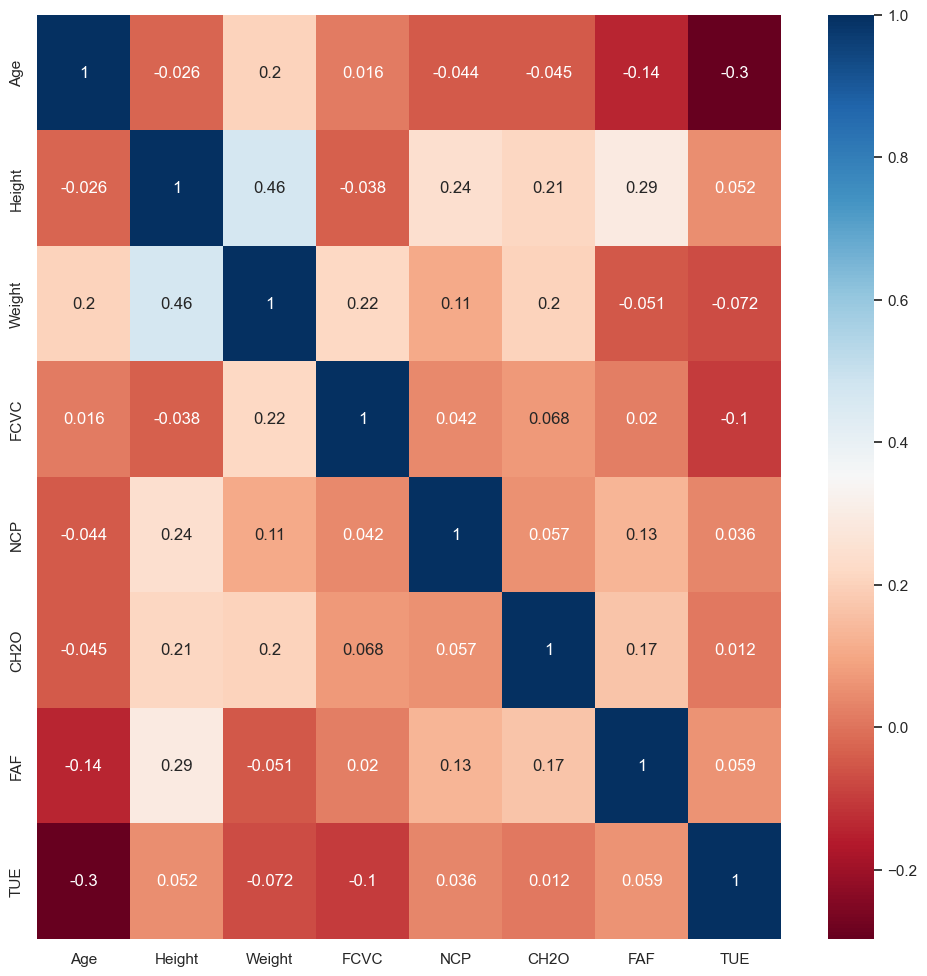

In [23]:
corr=df[num_cols].corr()
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(corr,cmap="RdBu",annot=True)
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Kategorik verileri etiketleme (Label Encoding)
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

# Özellikler ve hedef değişkeni ayırma
X = df.drop('NObeyesdad', axis=1)  # Özellikler
y = df['NObeyesdad']  # Hedef değişken

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [30]:
# KNN algoritmasını tanımlama (komşu sayısını değiştirerek)
from sklearn.neighbors import KNeighborsClassifier

k = 1
knn = KNeighborsClassifier(n_neighbors=k)

# Modeli eğitim verisi ile eğitme
knn.fit(X_train, y_train)

# Test verisi ile tahmin yapma
y_pred = knn.predict(X_test)

# Doğruluk yüzdesini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN (komşu sayısı = {k}) Doğruluk: {accuracy:.2f}%')

KNN (komşu sayısı = 1) Doğruluk: 0.83%


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [31]:
# Gaussian Naive Bayes sınıflandırıcısını tanımlama ve eğitme
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Gaussian Naive Bayes ile tahmin yapma
y_pred_gnb = gnb.predict(X_test)

# Doğruluk yüzdesini hesaplama ve yazdırma
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f'Gaussian Naive Bayes Doğruluk: {accuracy_gnb:.2f}%')


Gaussian Naive Bayes Doğruluk: 0.61%


In [32]:
from sklearn.tree import DecisionTreeClassifier

# Karar Ağacı sınıflandırıcısını tanımlama ve eğitme
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Karar Ağacı ile tahmin yapma
y_pred_dt = dt.predict(X_test)

# Doğruluk yüzdesini hesaplama ve yazdırma
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Karar Ağaçları Doğruluk: {accuracy_dt:.2f}%')


Karar Ağaçları Doğruluk: 0.91%


In [33]:
from sklearn.linear_model import LogisticRegression

# Lojistik Regresyon modelini tanımlama ve eğitme
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Lojistik Regresyon ile tahmin yapma
y_pred_lr = lr.predict(X_test)

# Doğruluk yüzdesini hesaplama ve yazdırma
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Lojistik Regresyon Doğruluk: {accuracy_lr:.2f}%')


Lojistik Regresyon Doğruluk: 0.86%


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest sınıflandırıcısını tanımlama ve eğitme
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Random Forest ile tahmin yapma
y_pred_rf = rf.predict(X_test)

# Doğruluk yüzdesini hesaplama ve yazdırma
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Doğruluk: {accuracy_rf:.2f}%')


Random Forest Doğruluk: 0.94%


In [35]:
from sklearn.svm import SVC

# SVM modelini tanımlama ve eğitme
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# SVM ile tahmin yapma
y_pred_svm = svm.predict(X_test)

# Doğruluk yüzdesini hesaplama ve yazdırma
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Doğruluk: {accuracy_svm:.2f}%')


SVM Doğruluk: 0.95%


In [37]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient Boosting modelini tanımlama ve eğitme
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)

# Test verisi ile tahmin yapma
y_pred = gradient_boosting.predict(X_test)

# Doğruluk yüzdesini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f'Gradient Boosting Doğruluk: {accuracy:.2f}%')

Gradient Boosting Doğruluk: 0.95%


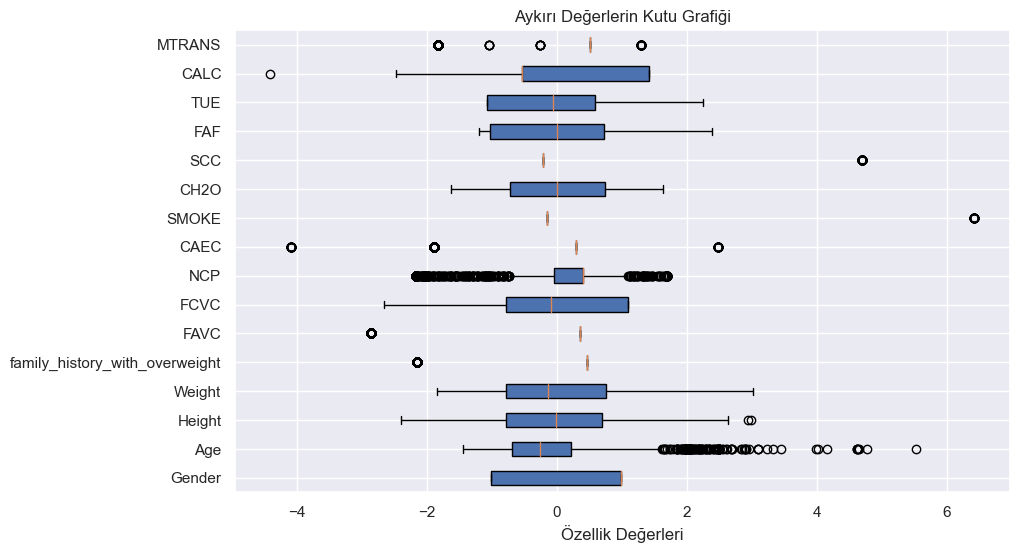

In [38]:
import matplotlib.pyplot as plt

# Özelliklerin kutu grafiğini oluşturma
plt.figure(figsize=(10, 6))
plt.boxplot(X_train, vert=False, patch_artist=True)
plt.title('Aykırı Değerlerin Kutu Grafiği')
plt.xlabel('Özellik Değerleri')
plt.yticks(range(1, len(X.columns) + 1), X.columns)
plt.show()


In [41]:
# Aykırı değerleri IQR yöntemi ile tespit ve çıkarma
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]

# Sadece sayısal sütunları seç
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Aykırı değerleri çıkar
data_cleaned = remove_outliers(df, numeric_columns)

# Aykırı değerler çıkarıldıktan sonra veri setinin boyutunu yazdırma
print(f'Orijinal veri seti boyutu: {df.shape}')
print(f'Temizlenmiş veri seti boyutu: {data_cleaned.shape}')

# Temizlenmiş veri setini inceleyin
print(data_cleaned.head())

Orijinal veri seti boyutu: (2111, 17)
Temizlenmiş veri seti boyutu: (1409, 17)
   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
5       1  29.0    1.62    53.0                               0     1   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  
5  3.0     2      0   2.0    0  0.0  0.0     2       0           1  


In [42]:
data_cleaned.to_csv("veriseti_aykirisiz.csv", index=False)


In [43]:
data_no_outliers = pd.read_csv("veriseti_aykirisiz.csv")


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Aykırı değerleri IQR yöntemi ile tespit ve çıkarma
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]

# Veri setini yükle
data = pd.read_csv("veriseti_aykirisiz.csv")

# Sadece sayısal sütunları seç
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Aykırı değerleri çıkar
data_cleaned = remove_outliers(data, numeric_columns)

# Özellikler ve hedef değişkeni ayırma
X = data_cleaned.drop('NObeyesdad', axis=1)  # Özellikler
y = data_cleaned['NObeyesdad']  # Hedef değişken

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN algoritmasını tanımlama (komşu sayısını değiştirerek)
k = 1 # Komşu sayısını burada değiştirebilirsiniz
knn = KNeighborsClassifier(n_neighbors=k)

# Modeli eğitim verisi ile eğitme
knn.fit(X_train, y_train)

# Test verisi ile tahmin yapma
y_pred = knn.predict(X_test)

# Doğruluk yüzdesini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN (komşu sayısı = {k}) Doğruluk: {accuracy:.2f}%')


KNN (komşu sayısı = 1) Doğruluk: 0.93%


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [45]:

# Naive Bayes algoritmasını tanımlama
naive_bayes = GaussianNB()

# Modeli eğitim verisi ile eğitme
naive_bayes.fit(X_train, y_train)

# Test verisi ile tahmin yapma
y_pred = naive_bayes.predict(X_test)

# Doğruluk yüzdesini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f'Naive Bayes Doğruluk: {accuracy:.2f}%')

Naive Bayes Doğruluk: 0.89%


In [46]:
# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Lojistik regresyon modelini tanımlama ve eğitme
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Test verisi ile tahmin yapma
y_pred = log_reg.predict(X_test)

# Doğruluk yüzdesini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f'Lojistik Regresyon Doğruluk: {accuracy:.2f}%')

Lojistik Regresyon Doğruluk: 0.90%


In [47]:
# Karar Ağacı modelini tanımlama ve eğitme
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Test verisi ile tahmin yapma
y_pred = decision_tree.predict(X_test)

# Doğruluk yüzdesini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f'Karar Ağaçları Doğruluk: {accuracy:.2f}%')

Karar Ağaçları Doğruluk: 0.97%


In [48]:
# Random Forest modelini tanımlama ve eğitme
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Test verisi ile tahmin yapma
y_pred = random_forest.predict(X_test)

# Doğruluk yüzdesini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Doğruluk: {accuracy:.2f}%')

Random Forest Doğruluk: 0.95%


In [49]:

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM modelini tanımlama ve eğitme
svm = SVC()
svm.fit(X_train, y_train)

# Test verisi ile tahmin yapma
y_pred = svm.predict(X_test)

# Doğruluk yüzdesini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Doğruluk: {accuracy:.2f}%')


SVM Doğruluk: 0.93%


In [50]:
# Gradient Boosting modelini tanımlama ve eğitme
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)

# Test verisi ile tahmin yapma
y_pred = gradient_boosting.predict(X_test)

# Doğruluk yüzdesini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f'Gradient Boosting Doğruluk: {accuracy:.2f}%')

Gradient Boosting Doğruluk: 0.97%


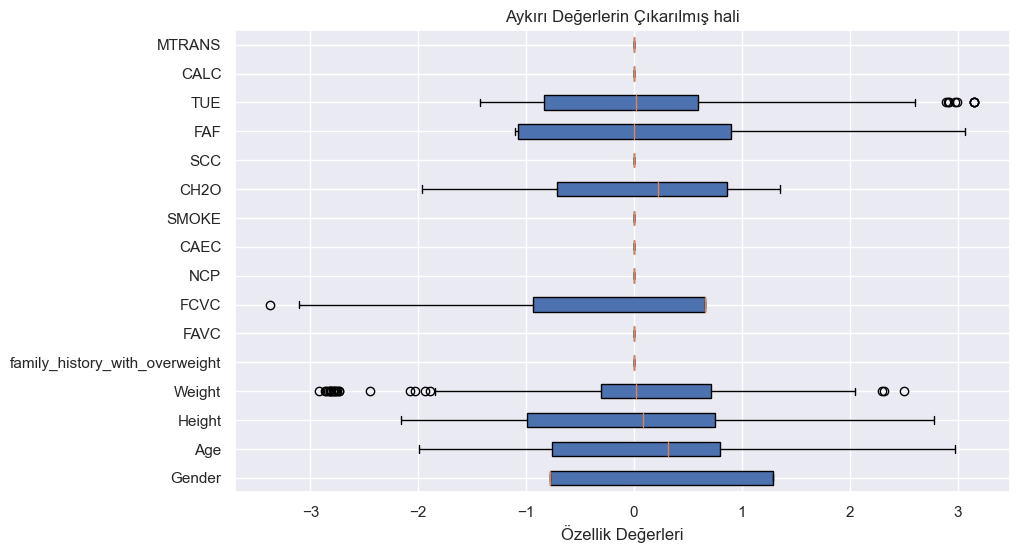

In [219]:
import matplotlib.pyplot as plt

# Özelliklerin kutu grafiğini oluşturma
plt.figure(figsize=(10, 6))
plt.boxplot(X_train, vert=False, patch_artist=True)
plt.title('Aykırı Değerlerin Çıkarılmış hali')
plt.xlabel('Özellik Değerleri')
plt.yticks(range(1, len(X.columns) + 1), X.columns)
plt.show()
